<a href="https://colab.research.google.com/github/vishalsingh1080/Carbon-dioxide-emission-regression-analysis/blob/main/CO2_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade statsmodels -q

     |████████████████████████████████| 9.8 MB 28.9 MB/s 


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import re
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
df = pd.read_csv('/content/gdrive/My Drive/co2_emissions/co2_emissions_Canada.csv')
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
train_df=df.sample(frac=0.8,random_state=200) 
test_df=df.drop(train_df.index)

In [6]:
train_df.reset_index(drop=True,inplace=True)
test_df.reset_index(drop=True,inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5908 entries, 0 to 5907
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              5908 non-null   object 
 1   Model                             5908 non-null   object 
 2   Vehicle Class                     5908 non-null   object 
 3   Engine Size(L)                    5908 non-null   float64
 4   Cylinders                         5908 non-null   int64  
 5   Transmission                      5908 non-null   object 
 6   Fuel Type                         5908 non-null   object 
 7   Fuel Consumption City (L/100 km)  5908 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   5908 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  5908 non-null   float64
 10  Fuel Consumption Comb (mpg)       5908 non-null   int64  
 11  CO2 Emissions(g/km)               5908 non-null   int64  
dtypes: flo

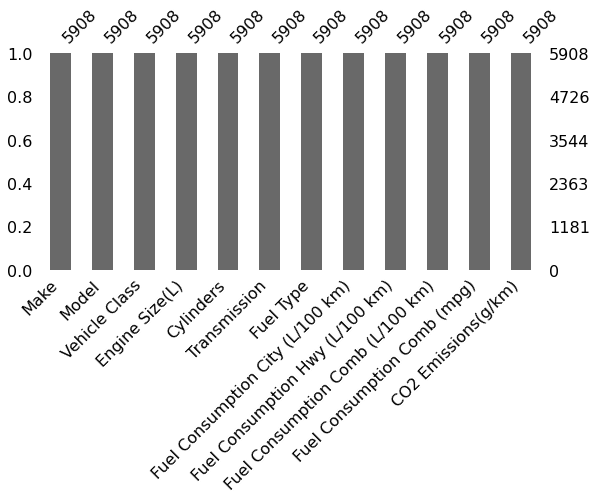

In [7]:
msno.bar(train_df,figsize=(9,4))
plt.show()

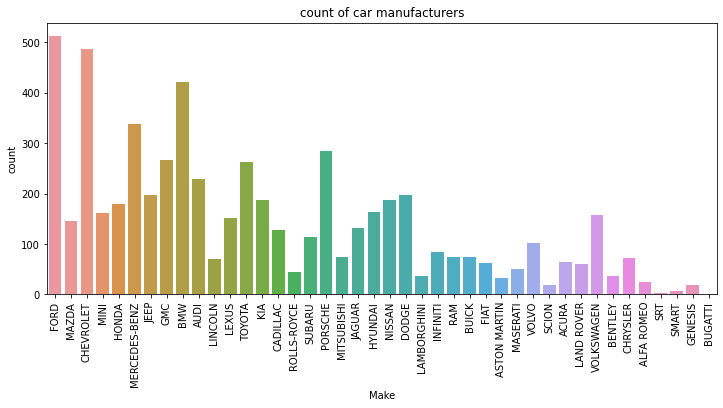

In [8]:
plt.figure(figsize=(12,5))
sns.countplot(x='Make',data=train_df).set(title='count of car manufacturers')
plt.xticks(rotation=90)
plt.show()

In [9]:
print('The no. of unique car models in train split - {}'.format(train_df.Model.nunique()))
print('The no. of unique car models in test split - {}'.format(test_df.Model.nunique()))

The no. of unique car models in train split - 1936
The no. of unique car models in test split - 954


In [10]:
train_df.drop('Model',inplace=True,axis=1)
test_df.drop('Model',inplace=True,axis=1)
train_df.drop('Make',inplace=True,axis=1)
test_df.drop('Make',inplace=True,axis=1)

In [11]:
train_df['Vehicle Class'].unique()

array(['FULL-SIZE', 'COMPACT', 'MID-SIZE', 'SUV - STANDARD',
       'SUV - SMALL', 'TWO-SEATER', 'PICKUP TRUCK - SMALL', 'MINICOMPACT',
       'PICKUP TRUCK - STANDARD', 'SUBCOMPACT', 'STATION WAGON - SMALL',
       'STATION WAGON - MID-SIZE', 'VAN - PASSENGER', 'MINIVAN',
       'SPECIAL PURPOSE VEHICLE', 'VAN - CARGO'], dtype=object)

In [12]:
test_df['Vehicle Class'].unique()

array(['COMPACT', 'TWO-SEATER', 'FULL-SIZE', 'SUBCOMPACT',
       'STATION WAGON - SMALL', 'SUV - STANDARD', 'SUV - SMALL',
       'MID-SIZE', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'MINICOMPACT',
       'PICKUP TRUCK - SMALL', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE'], dtype=object)

In [13]:
def class_replace(x):

    rgx1 = r'COMPACT'
    rgx2 = r'WAGON'
    rgx3 = r'SUV'
    rgx4 = r'VAN'
    rgx5 = r'SIZE'
    rgx6 = r'TRUCK'

    if re.search(rgx1,x):
       return 'compact'
    elif re.search(rgx2,x):
       return 'wagon'
    elif re.search(rgx3,x):
       return 'suv'
    elif re.search(rgx4,x):
       return 'van'
    elif re.search(rgx5,x):
       return 'sedan'   
    elif re.search(rgx6,x):
       return 'truck'   
    else:
       return x.lower()   

In [14]:
train_df['Vehicle Class'] = train_df['Vehicle Class'].apply(class_replace)
test_df['Vehicle Class'] = test_df['Vehicle Class'].apply(class_replace)

In [15]:
train_df['Vehicle Class'].unique()

array(['sedan', 'compact', 'suv', 'two-seater', 'truck', 'wagon', 'van',
       'special purpose vehicle'], dtype=object)

In [16]:
test_df['Vehicle Class'].unique()

array(['compact', 'two-seater', 'sedan', 'wagon', 'suv', 'van', 'truck',
       'special purpose vehicle'], dtype=object)

In [17]:
train_df.Transmission.unique()

array(['AS6', 'M6', 'A7', 'A9', 'A6', 'AS8', 'AV', 'AS9', 'AV7', 'M7',
       'AS10', 'AS7', 'A8', 'M5', 'AM6', 'AV6', 'AM7', 'A10', 'A5', 'AV8',
       'AM8', 'AS5', 'A4', 'AM9', 'AM5', 'AV10', 'AS4'], dtype=object)

In [18]:
test_df.Transmission.unique()

array(['AV7', 'AM7', 'M6', 'AS8', 'A6', 'A8', 'AS6', 'A4', 'M5', 'A5',
       'AM6', 'AV', 'AS7', 'A9', 'M7', 'AS4', 'AM5', 'AS5', 'AV6', 'A7',
       'AS10', 'AV8', 'AS9', 'AM8', 'A10'], dtype=object)

In [19]:
def gear_info(x):

    rgx1 = r'^AV'
    rgx2 = r'^AM'
    rgx3 = r'^AS'
    rgx4 = r'^M'

    if re.search(rgx1,x):
       return 0
    elif re.search(rgx2,x):
       return int(x[2:])
    elif re.search(rgx3,x):
       return int(x[2:])
    elif re.search(rgx4,x):
       return int(x[1:])
    else:
       return int(x[1:])


In [20]:
train_df['gears'] = train_df['Transmission'].apply(gear_info)
test_df['gears'] = test_df['Transmission'].apply(gear_info)

In [21]:
def transmission_type(x):

    rgx1 = r'^AV'
    rgx2 = r'^AM'
    rgx3 = r'^AS'
    rgx4 = r'^M'

    if re.search(rgx1,x):
       return 'cv'
    elif re.search(rgx2,x):
       return 'auto'
    elif re.search(rgx3,x):
       return 'semi-auto'
    elif re.search(rgx4,x):
       return 'manual'
    else:
       return 'auto'


In [22]:
train_df['Transmission'] = train_df['Transmission'].apply(transmission_type)
test_df['Transmission'] = test_df['Transmission'].apply(transmission_type)

In [23]:
test_df['Transmission'].unique()

array(['cv', 'auto', 'manual', 'semi-auto'], dtype=object)

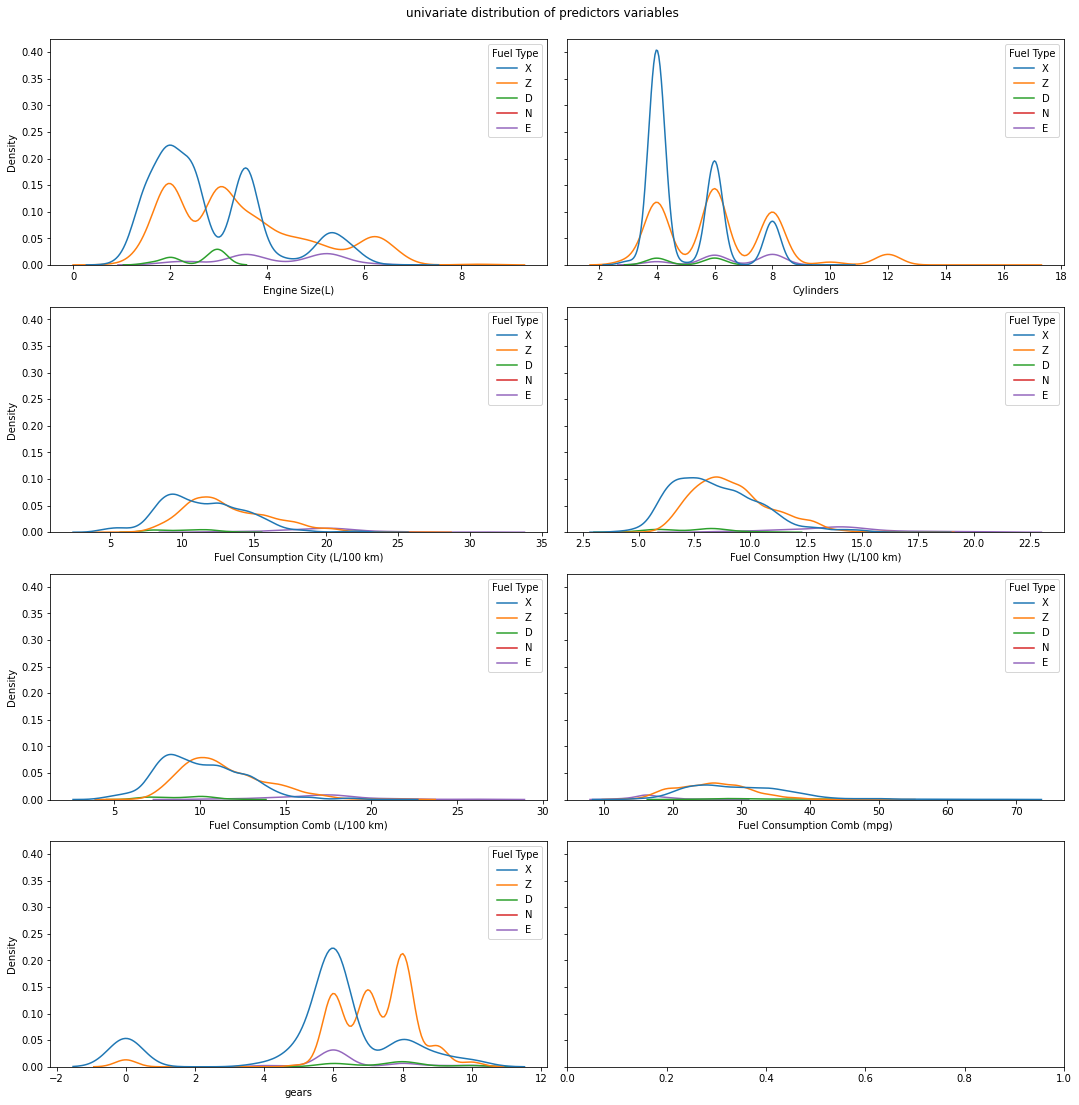

In [24]:
fig, axes = plt.subplots(4,2, figsize=(15, 15), sharey=True)

sns.kdeplot(x = 'Engine Size(L)',hue='Fuel Type',data = train_df,ax=axes[0,0],color='r')
sns.kdeplot(x = 'Cylinders',hue='Fuel Type',data = train_df,ax=axes[0,1],color='g')
sns.kdeplot(x = 'Fuel Consumption City (L/100 km)',hue='Fuel Type',data = train_df,ax=axes[1,0],color='b')
sns.kdeplot(x = 'Fuel Consumption Hwy (L/100 km)',hue='Fuel Type',data = train_df,ax=axes[1,1],color='y')
sns.kdeplot(x = 'Fuel Consumption Comb (L/100 km)',hue='Fuel Type',data = train_df,ax=axes[2,0],color='c')
sns.kdeplot(x = 'Fuel Consumption Comb (mpg)',hue='Fuel Type', data = train_df,ax=axes[2,1],color='m')
sns.kdeplot(x = 'gears',hue='Fuel Type',data = train_df,ax=axes[3,0],color='k')

fig.suptitle('univariate distribution of predictors variables',y=1.02) 
plt.tight_layout()
plt.show()

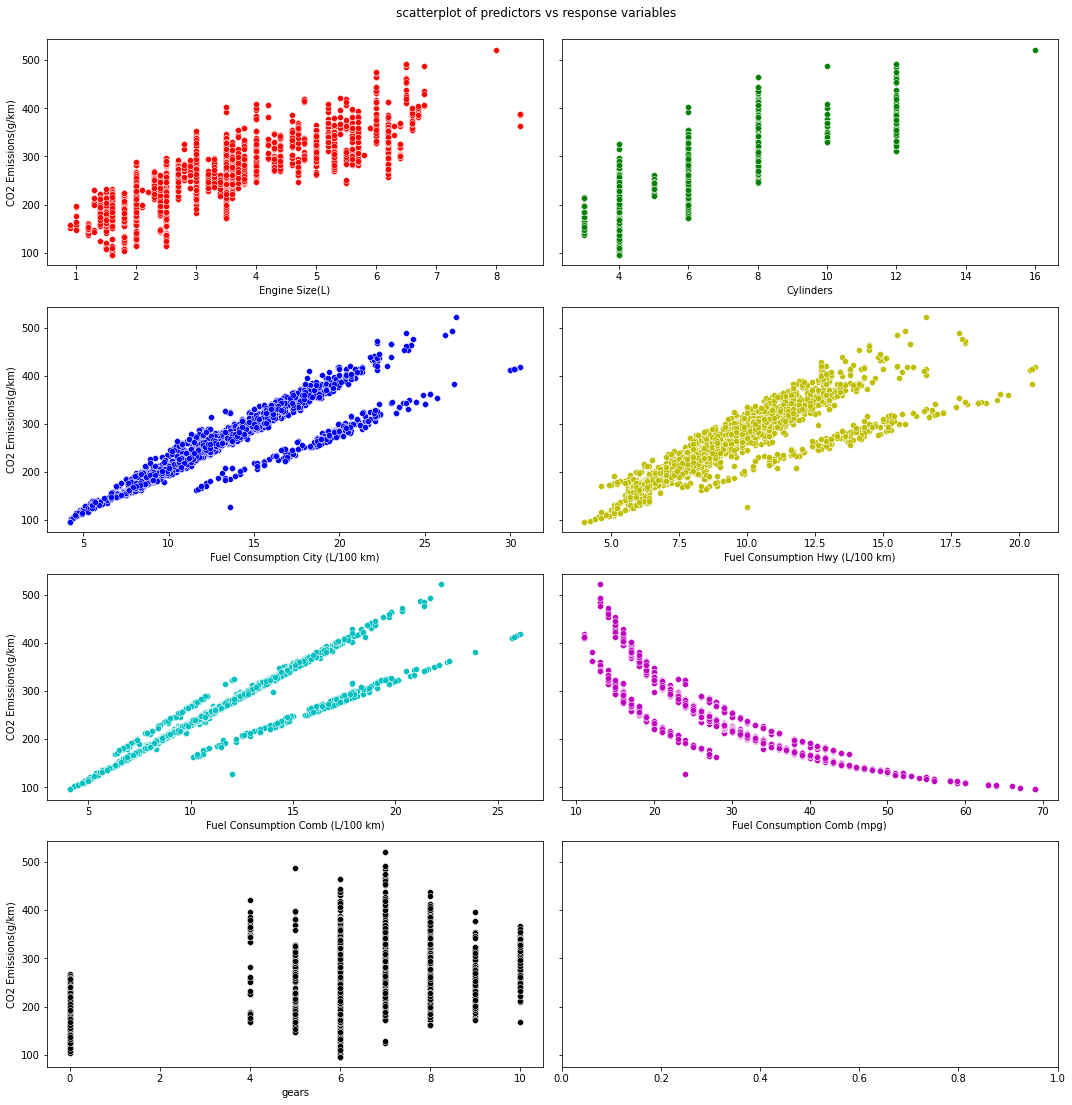

In [25]:
fig, axes = plt.subplots(4,2, figsize=(15, 15), sharey=True)

sns.scatterplot(x = 'Engine Size(L)', y = 'CO2 Emissions(g/km)',data = train_df,ax=axes[0,0],color='r')
sns.scatterplot(x = 'Cylinders', y = 'CO2 Emissions(g/km)',data = train_df,ax=axes[0,1],color='g')
sns.scatterplot(x = 'Fuel Consumption City (L/100 km)', y = 'CO2 Emissions(g/km)',data = train_df,ax=axes[1,0],color='b')
sns.scatterplot(x = 'Fuel Consumption Hwy (L/100 km)', y = 'CO2 Emissions(g/km)',data = train_df,ax=axes[1,1],color='y')
sns.scatterplot(x = 'Fuel Consumption Comb (L/100 km)', y = 'CO2 Emissions(g/km)',data = train_df,ax=axes[2,0],color='c')
sns.scatterplot(x = 'Fuel Consumption Comb (mpg)', y = 'CO2 Emissions(g/km)',data = train_df,ax=axes[2,1],color='m')
sns.scatterplot(x = 'gears', y = 'CO2 Emissions(g/km)',data = train_df,ax=axes[3,0],color='k')

fig.suptitle('scatterplot of predictors vs response variables',y=1.02) 
plt.tight_layout()
plt.show()

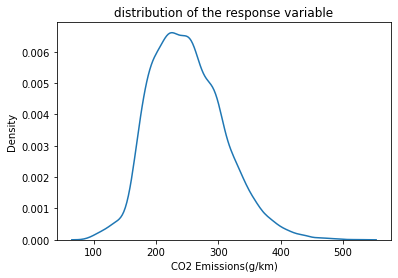

In [26]:
sns.kdeplot('CO2 Emissions(g/km)',data=train_df).set(title='distribution of the response variable')
plt.show()

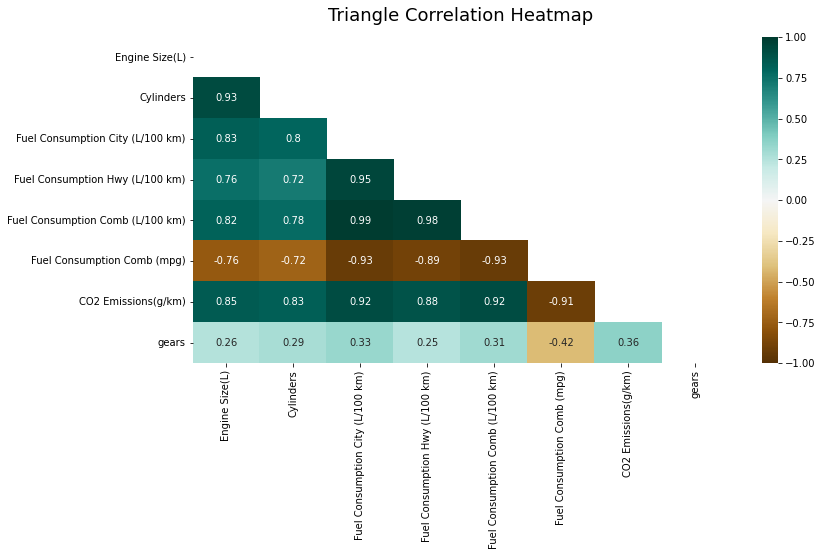

In [27]:
plt.figure(figsize=(12, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(train_df.corr(), dtype=np.bool))
heatmap = sns.heatmap(train_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [28]:
# centering independent variable
ls = ['Engine Size(L)','Cylinders','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)','gears']

for col in ls:
    mean1 = train_df[col].mean()
    train_df[col] = train_df[col] - mean1

    mean2 = test_df[col].mean()
    test_df[col] = test_df[col] - mean2


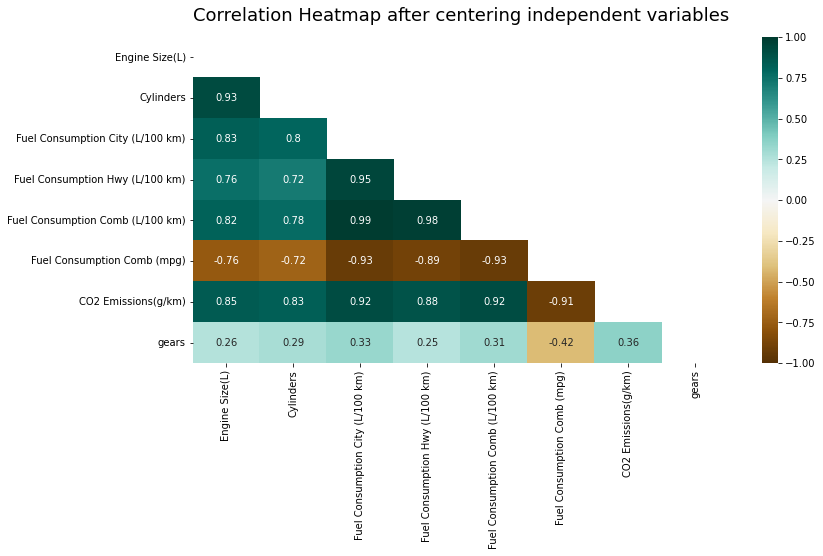

In [29]:
plt.figure(figsize=(12, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(train_df.corr(), dtype=np.bool))
heatmap = sns.heatmap(train_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap after centering independent variables', fontdict={'fontsize':18}, pad=16);

In [30]:
# dropping gear variables as it is not correlated at all with dependent variable
# high multicollinearity present. Can be only used for prediction
train_df.drop('gears',inplace=True,axis=1)
test_df.drop('gears',inplace=True,axis=1)

In [31]:
train_df['Fuel Type'].unique()

array(['X', 'Z', 'D', 'N', 'E'], dtype=object)

In [32]:
test_df['Fuel Type'].unique()

array(['Z', 'D', 'X', 'E'], dtype=object)

In [33]:
#creating dummy variable
car_type1 = pd.get_dummies(train_df['Vehicle Class'])
fuel1 = pd.get_dummies(train_df['Fuel Type'])
gear1 = pd.get_dummies(train_df['Transmission'])

car_type2 = pd.get_dummies(test_df['Vehicle Class'])
fuel2 = pd.get_dummies(test_df['Fuel Type'])
gear2 = pd.get_dummies(test_df['Transmission'])

In [34]:
car_type1.drop('two-seater',inplace=True,axis=1)
gear1.drop('manual',inplace=True,axis=1)
fuel1.drop('N',inplace=True,axis=1)

car_type2.drop('two-seater',inplace=True,axis=1)
gear2.drop('manual',inplace=True,axis=1)

In [35]:
train_df.drop(['Vehicle Class','Fuel Type','Transmission'],inplace=True,axis=1)
test_df.drop(['Vehicle Class','Fuel Type','Transmission'],inplace=True,axis=1)

In [36]:
train_df = pd.concat([train_df,car_type1,gear1,fuel1], axis=1,copy=False)
test_df = pd.concat([test_df,car_type2,gear2,fuel2],axis=1,copy=False)

In [37]:
train_df.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),compact,sedan,special purpose vehicle,suv,truck,van,wagon,auto,cv,semi-auto,D,E,X,Z
0,-1.163321,-1.620515,-0.742789,-0.935782,-0.864658,0.47698,238,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,-1.163321,-1.620515,-4.042789,-2.835782,-3.464658,10.47698,175,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0.436679,0.379485,1.657211,-0.435782,0.735342,-3.52302,269,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,-1.163321,-1.620515,-1.942789,-1.635782,-1.764658,3.47698,215,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,-1.163321,-1.620515,-1.842789,-1.735782,-1.764658,3.47698,214,0,1,0,0,0,0,0,0,0,0,0,0,1,0


# Modeling :-

In [38]:
X = train_df.drop('CO2 Emissions(g/km)',axis=1)
X1 = sm.add_constant(X) # adding a constant
Y = train_df['CO2 Emissions(g/km)']

model = sm.OLS(Y, X1).fit()

print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.993
Model:                             OLS   Adj. R-squared:                  0.993
Method:                  Least Squares   F-statistic:                 4.137e+04
Date:                 Thu, 18 Nov 2021   Prob (F-statistic):               0.00
Time:                         19:43:09   Log-Likelihood:                -17806.
No. Observations:                 5908   AIC:                         3.565e+04
Df Residuals:                     5887   BIC:                         3.580e+04
Df Model:                           20                                         
Covariance Type:             nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [39]:
train_df['inverse_fuel_consumption(mpg)^2'] = 1/(train_df['Fuel Consumption Comb (mpg)'] * train_df['Fuel Consumption Comb (mpg)'])
test_df['inverse_fuel_consumption(mpg)^2'] = 1/(test_df['Fuel Consumption Comb (mpg)'] * test_df['Fuel Consumption Comb (mpg)'])

In [40]:
X = train_df.drop(['CO2 Emissions(g/km)'],axis=1)
X1 = sm.add_constant(X) 
Y = train_df['CO2 Emissions(g/km)']

model = sm.OLS(Y, X1).fit()

print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.993
Model:                             OLS   Adj. R-squared:                  0.993
Method:                  Least Squares   F-statistic:                 3.949e+04
Date:                 Thu, 18 Nov 2021   Prob (F-statistic):               0.00
Time:                         19:43:09   Log-Likelihood:                -17800.
No. Observations:                 5908   AIC:                         3.564e+04
Df Residuals:                     5886   BIC:                         3.579e+04
Df Model:                           21                                         
Covariance Type:             nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

<Figure size 576x360 with 0 Axes>

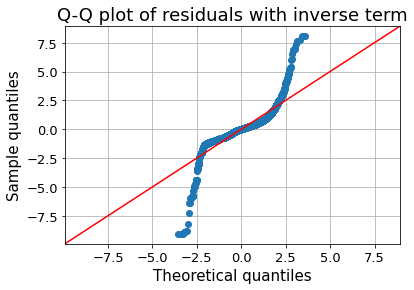

In [41]:
plt.figure(figsize=(8,5))
fig=qqplot(model.resid_pearson,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=15)
plt.ylabel("Sample quantiles",fontsize=15)
plt.title("Q-Q plot of residuals with inverse term",fontsize=18)
plt.grid(True)
plt.show()

In [42]:
# dropping engine size from model
# checking how it impacts overall significance (f-stat) 
X = train_df.drop(['CO2 Emissions(g/km)','Engine Size(L)'],axis=1)
X1 = sm.add_constant(X) 
Y = train_df['CO2 Emissions(g/km)']

model = sm.OLS(Y, X1).fit()

print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.993
Model:                             OLS   Adj. R-squared:                  0.993
Method:                  Least Squares   F-statistic:                 4.147e+04
Date:                 Thu, 18 Nov 2021   Prob (F-statistic):               0.00
Time:                         19:43:09   Log-Likelihood:                -17800.
No. Observations:                 5908   AIC:                         3.564e+04
Df Residuals:                     5887   BIC:                         3.578e+04
Df Model:                           20                                         
Covariance Type:             nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [43]:
# further dropping transmission type dummy variables from the model 
X = train_df.drop(['CO2 Emissions(g/km)','Engine Size(L)','auto','cv','semi-auto'],axis=1)
X1 = sm.add_constant(X)
Y = train_df['CO2 Emissions(g/km)']

model = sm.OLS(Y, X1).fit()

print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.993
Model:                             OLS   Adj. R-squared:                  0.993
Method:                  Least Squares   F-statistic:                 4.879e+04
Date:                 Thu, 18 Nov 2021   Prob (F-statistic):               0.00
Time:                         19:43:09   Log-Likelihood:                -17801.
No. Observations:                 5908   AIC:                         3.564e+04
Df Residuals:                     5890   BIC:                         3.576e+04
Df Model:                           17                                         
Covariance Type:             nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

<Figure size 576x360 with 0 Axes>

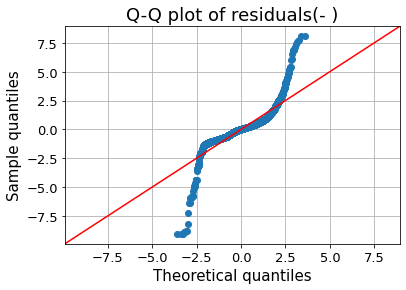

In [44]:
plt.figure(figsize=(8,5))
fig=qqplot(model.resid_pearson,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=15)
plt.ylabel("Sample quantiles",fontsize=15)
plt.title("Q-Q plot of residuals(- )",fontsize=18)
plt.grid(True)
plt.show()

In [45]:
# removing model type 

X = train_df.drop(['CO2 Emissions(g/km)','Engine Size(L)','auto','cv','semi-auto','compact','sedan','special purpose vehicle','suv','truck','van','wagon'],axis=1)
X1 = sm.add_constant(X)
Y = train_df['CO2 Emissions(g/km)']

model = sm.OLS(Y, X1).fit()

print(model.summary())


                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.993
Model:                             OLS   Adj. R-squared:                  0.993
Method:                  Least Squares   F-statistic:                 8.068e+04
Date:                 Thu, 18 Nov 2021   Prob (F-statistic):               0.00
Time:                         19:43:10   Log-Likelihood:                -17886.
No. Observations:                 5908   AIC:                         3.579e+04
Df Residuals:                     5897   BIC:                         3.587e+04
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

## Handling outliers using inter-quartile range

In [46]:
Q1 = train_df[['Cylinders','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)']].quantile(0.25)
Q3 = train_df[['Cylinders','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)']].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Cylinders                            2.0
Fuel Consumption City (L/100 km)     4.5
Fuel Consumption Hwy (L/100 km)      2.7
Fuel Consumption Comb (L/100 km)     3.7
Fuel Consumption Comb (mpg)         10.0
dtype: float64


In [47]:
df = train_df.drop(['Engine Size(L)','auto','cv','semi-auto','compact','sedan','special purpose vehicle','suv','truck','van','wagon'],axis=1)

X = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
X.shape

(5496, 11)

In [48]:
X.columns

Index(['Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)', 'D', 'E', 'X',
       'Z', 'inverse_fuel_consumption(mpg)^2'],
      dtype='object')

In [49]:
X1 = sm.add_constant(X.drop(['CO2 Emissions(g/km)'],axis=1))
Y = X['CO2 Emissions(g/km)']

model = sm.OLS(Y, X1).fit()

print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.995
Model:                             OLS   Adj. R-squared:                  0.995
Method:                  Least Squares   F-statistic:                 1.094e+05
Date:                 Thu, 18 Nov 2021   Prob (F-statistic):               0.00
Time:                         19:43:10   Log-Likelihood:                -14781.
No. Observations:                 5496   AIC:                         2.958e+04
Df Residuals:                     5485   BIC:                         2.966e+04
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

<Figure size 576x360 with 0 Axes>

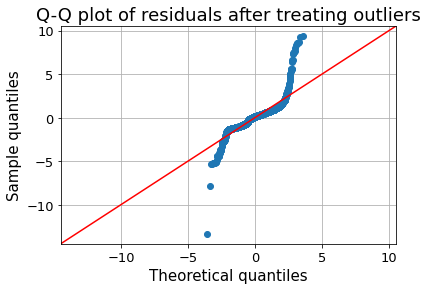

In [50]:
plt.figure(figsize=(8,5))
fig=qqplot(model.resid_pearson,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=15)
plt.ylabel("Sample quantiles",fontsize=15)
plt.title("Q-Q plot of residuals after treating outliers",fontsize=18)
plt.grid(True)
plt.show()

## removing influential points 

In [51]:
# trying to remove influential points 
influence = model.get_influence()
inf_sum = influence.summary_frame()

In [52]:
inf_sum.shape

(5496, 17)

In [53]:
training_set_target = pd.DataFrame(X['CO2 Emissions(g/km)'],columns=['target'])
concatenated_df =  pd.concat([training_set_target, inf_sum], axis = 1)

In [54]:
#Number of observations
n = X.shape[0]
#Predictors
k = X.shape[1]
#Leverage
cutoff_leverage = ((2*k)+2)/n

In [55]:
leverage = concatenated_df.hat_diag

In [56]:
studentized_resids =  concatenated_df.student_resid

outliers = pd.DataFrame((concatenated_df.student_resid[abs(studentized_resids) >= 3]))
high_leverage = pd.DataFrame((concatenated_df.hat_diag[abs(leverage) > cutoff_leverage]))

In [57]:
influential_points =pd.merge(outliers,high_leverage, left_index=True, right_index=True)
print(influential_points)

      student_resid  hat_diag
106       -4.452454  0.006601
514        7.633634  0.009337
515        4.892609  0.006594
533        5.040223  0.010026
593        3.898621  0.007758
...             ...       ...
5457      -5.380598  0.006918
5646       5.040223  0.010026
5647      -3.682861  0.006918
5649      -5.380598  0.006918
5719     -13.616520  0.007348

[69 rows x 2 columns]


In [58]:
cutoff_cooks = (concatenated_df.loc[:,"cooks_d"].mean())*3
outliers_2 = pd.DataFrame((concatenated_df.cooks_d[abs(concatenated_df.cooks_d) > cutoff_cooks]))

In [59]:
#Influential datapoints identified as both Outliers and have High Leverage
index_1 = influential_points.index.to_list()

#Outliers Identified Using Cooks Distances
index_2 = outliers_2.index.to_list()

In [60]:
train_x = X.drop(['CO2 Emissions(g/km)'],axis=1)
train_y = X['CO2 Emissions(g/km)']

train_x = train_x.drop(index_1).values
train_y = train_y.drop(index_1).values

In [61]:
model = sm.OLS(train_y , sm.add_constant(train_x)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.791e+05
Date:                Thu, 18 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:43:36   Log-Likelihood:                -13229.
No. Observations:                5427   AIC:                         2.648e+04
Df Residuals:                    5416   BIC:                         2.655e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        173.4256      2.775     62.506      0.0

<Figure size 576x360 with 0 Axes>

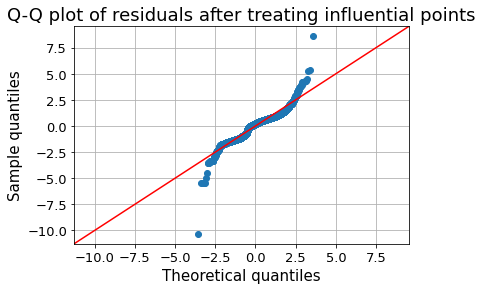

In [62]:
plt.figure(figsize=(8,5))
fig=qqplot(model.resid_pearson,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=15)
plt.ylabel("Sample quantiles",fontsize=15)
plt.title("Q-Q plot of residuals after treating influential points",fontsize=18)
plt.grid(True)
plt.show()

<Figure size 576x360 with 0 Axes>

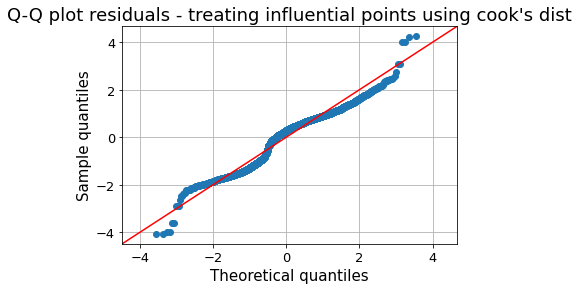

In [70]:
train_x = X.drop(['CO2 Emissions(g/km)'],axis=1)
train_y = X['CO2 Emissions(g/km)']

train_x = train_x.drop(index_2).values
train_y = train_y.drop(index_2).values

model = sm.OLS(train_y , sm.add_constant(train_x)).fit()

plt.figure(figsize=(8,5))
fig=qqplot(model.resid_pearson,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=15)
plt.ylabel("Sample quantiles",fontsize=15)
plt.title("Q-Q plot residuals - treating influential points using cook's dist",fontsize=18)
plt.grid(True)
plt.show()

 

* Now, the residuals are near normal. This would provide unbiased estimators for the parameters.


In [71]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.301e+05
Date:                Thu, 18 Nov 2021   Prob (F-statistic):               0.00
Time:                        20:09:19   Log-Likelihood:                -12060.
No. Observations:                5265   AIC:                         2.414e+04
Df Residuals:                    5254   BIC:                         2.421e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        173.7717      2.395     72.546      0.0

In [ ]:
# out of sample prediction
test_df.drop(['Engine Size(L)','compact','sedan','special purpose vehicle','suv','truck','van','wagon','auto','cv','semi-auto'],axis=1,inplace=True)

In [77]:
Xnew = test_df.drop('CO2 Emissions(g/km)',axis=1)
Xnew = sm.add_constant(Xnew)
y_pred = model.predict(Xnew)

In [65]:
def press_statistic(y_true, y_pred, xs):
    """
    Calculation of the `Press Statistics <https://www.otexts.org/1580>`_
    """
    res = y_pred - y_true
    hat = xs.dot(np.linalg.pinv(xs))
    den = (1 - np.diagonal(hat))
    sqr = np.square(res/den)
    return sqr.sum()

def predicted_r2(y_true, y_pred, xs):
    """
    Calculation of the `Predicted R-squared <https://rpubs.com/RatherBit/102428>`_
    """
    press = press_statistic(y_true=y_true,
                            y_pred=y_pred,
                            xs=xs
    )

    sst  = np.square( y_true - y_true.mean() ).sum()
    return 1 - press / sst

In [79]:
predicted_r2(test_df['CO2 Emissions(g/km)'], y_pred,test_df.drop('CO2 Emissions(g/km)',axis=1))

0.9903661017082944

In [80]:
predictions = model.get_prediction(sm.add_constant(test_df.drop('CO2 Emissions(g/km)',axis=1)))
predictions.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,134.980461,0.228733,134.532049,135.428874,130.267198,139.693725
1,339.980315,0.105301,339.773882,340.186748,335.283892,344.676739
2,357.288737,0.122442,357.048700,357.528775,352.590717,361.986758
3,224.831230,0.277357,224.287495,225.374965,220.107944,229.554516
4,411.871170,0.217003,411.445755,412.296586,407.160039,416.582302
...,...,...,...,...,...,...
1472,380.819045,0.159329,380.506694,381.131395,376.116775,385.521315
1473,299.655272,0.117081,299.425745,299.884800,294.957777,304.352767
1474,231.729745,0.080574,231.571785,231.887704,227.035202,236.424287
1475,272.103704,0.102780,271.902212,272.305197,267.407495,276.799913


In [78]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_df['CO2 Emissions(g/km)'], y_pred)

30.57636476374117